<a href="https://colab.research.google.com/github/Stella-Achar-Oiro/LP1-Data-Analysis-Project-2/blob/main/LP2_Project_Stella_Achar_Oiro_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Details
Name : Stella Achar Oiro <br>
email: stella.achar@azubiafrica.org <br>
Team: Prague <br>
Link to Github Repo - ([GitHub](https://github.com/Stella-Achar-Oiro/LP1-Data-Analysis-Project-2))
Project - Regression

# Intro - **Forecasting Grocery Sales for Favorita Supermarkets**
## General
**Description**

This project aims to analyze the sales data of Favorita supermarkets to develop a sales forecasting model. The data consists of daily sales for various stores and products, as well as various store and product-level attributes. 

The goal is to create a model that accurately predicts future sales based on the past trends and patterns. This can help Favorita optimize their inventory levels and make informed business decisions. 

The analysis will involve **data cleaning and preprocessing**, **feature engineering**, **model selection** and **evaluation**, and finally, **deployment** of the model. 

The results of the project can provide valuable insights for the grocery industry, particularly for companies looking to improve their sales forecasting accuracy.


**Null Hypothesis** (H0): The historical sales data and the factors such as store location, product type, promotions, and time-related variables do not have a significant impact on the sales of groceries at Favorita supermarkets.


**Alternative Hypothesis** (Ha): The historical sales data and the factors such as store location, product type, promotions, and time-related variables have a significant impact on the sales of groceries at Favorita supermarkets, allowing for the accurate prediction of future sales.

**Research Questions**
> 1. What factors have the greatest impact on the sales of groceries at - - - Favorita supermarkets?
> 2. How accurate is the sales forecasting model built using the historical sales data and the identified factors?
> 3. How does the sales forecasting model perform during peak periods, such as holidays and seasonal changes, compared to other times of the year?


# Setup
## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [ ]:
!pip install plotly


## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [ ]:
import numpy as np             # For numerical computations
import pandas as pd            # For data manipulation and analysis
import matplotlib.pyplot as plt            # For data visualization
import seaborn as sns          # For advanced data visualization
from sklearn.model_selection import train_test_split   # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler     # For scaling numeric data
from sklearn.linear_model import LinearRegression    # For linear regression
from sklearn.tree import DecisionTreeRegressor      # For decision tree regression
from sklearn.ensemble import RandomForestRegressor  # For random forest regression
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation metrics


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [ ]:
# Load CSV file into a pandas DataFrame
df_holidays_events = pd.read_csv('C:/Users/ADMIN/Downloads/store-sales-time-series-forecasting-20230213T092711Z-001/store-sales-time-series-forecasting/holidays_events.csv')
df_oil = pd.read_csv('C:/Users/ADMIN/Downloads/store-sales-time-series-forecasting-20230213T092711Z-001/store-sales-time-series-forecasting/oil.csv')
df_sample_submission = pd.read_csv('C:/Users/ADMIN/Downloads/store-sales-time-series-forecasting-20230213T092711Z-001/store-sales-time-series-forecasting/sample_submission.csv')
df_stores = pd.read_csv('C:/Users/ADMIN/Downloads/store-sales-time-series-forecasting-20230213T092711Z-001/store-sales-time-series-forecasting/stores.csv')
df_test = pd.read_csv('C:/Users/ADMIN/Downloads/store-sales-time-series-forecasting-20230213T092711Z-001/store-sales-time-series-forecasting/test.csv')
df_train = pd.read_csv('C:/Users/ADMIN/Downloads/store-sales-time-series-forecasting-20230213T092711Z-001/store-sales-time-series-forecasting/train.csv')
df_transactions = pd.read_csv('C:/Users/ADMIN/Downloads/store-sales-time-series-forecasting-20230213T092711Z-001/store-sales-time-series-forecasting/transactions.csv')

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

**df_train**

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
(3000888, 6)
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.0

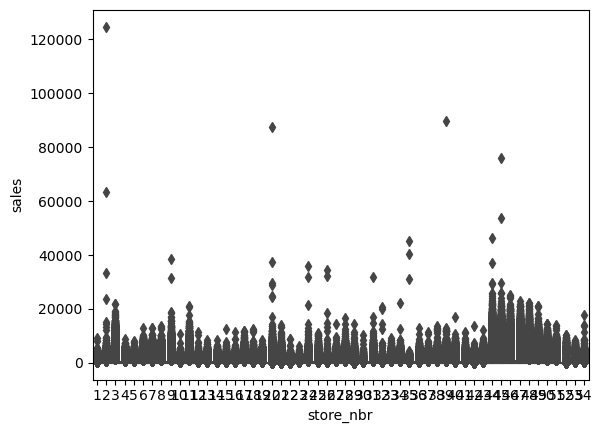

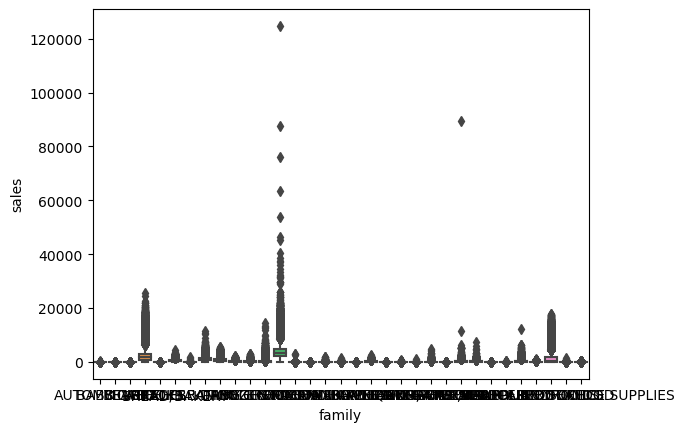

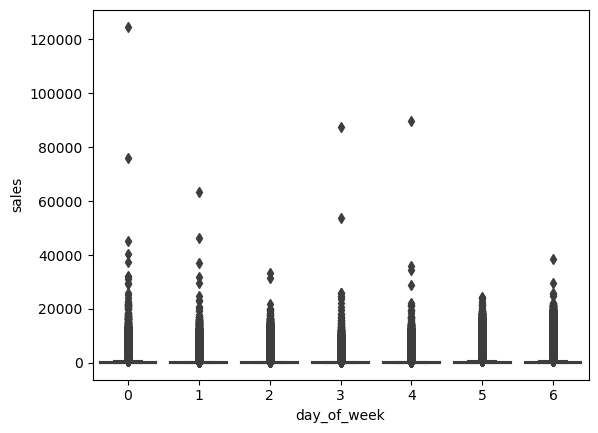

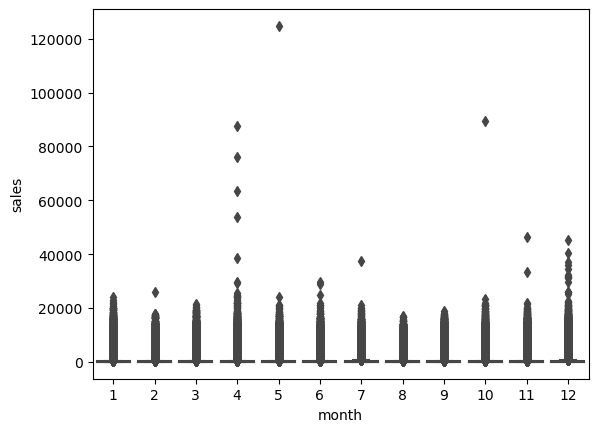

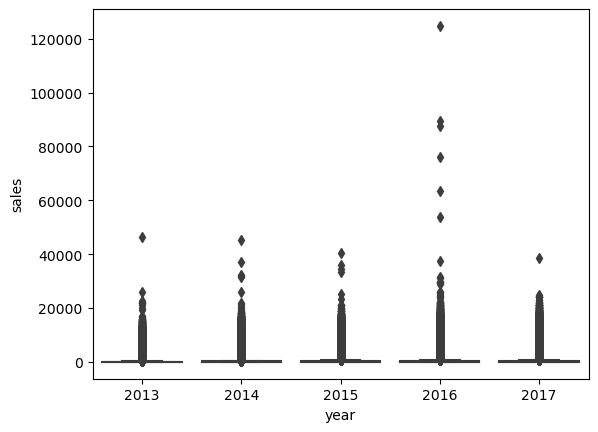

In [ ]:
# Check the first few rows of the data
print(df_train.head())

# Check the dimensions of the data
print(df_train.shape)

# Check for missing values
print(df_train.isnull().sum())

# Summary statistics of the numerical columns
print(df_train.describe())

df_train.info()


# Plot the sales for different stores
sns.boxplot(x='store_nbr', y='sales', data=df_train)
plt.show()

# Plot the sales for different items
sns.boxplot(x='family', y='sales', data=df_train)
plt.show()

# Convert the date column to datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Extract the day of the week, month, and year information
df_train['day_of_week'] = df_train['date'].dt.dayofweek
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year

# Plot the sales across different days of the week
sns.boxplot(x='day_of_week', y='sales', data=df_train)
plt.show()

# Plot the sales across different months
sns.boxplot(x='month', y='sales', data=df_train)
plt.show()

# Plot the sales across different years
sns.boxplot(x='year', y='sales', data=df_train)
plt.show()


**df_test**

        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0
(28512, 5)
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
                 id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000      6.000000
max    3.029399e+06     54.000000    646.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns

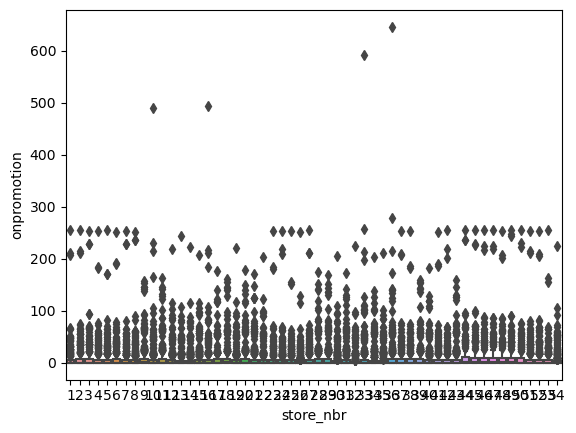

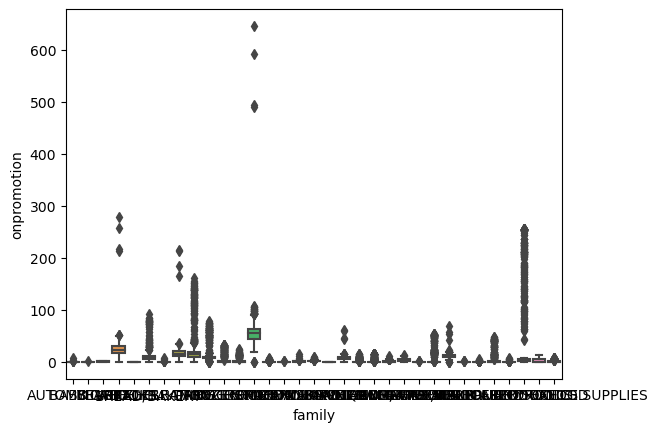

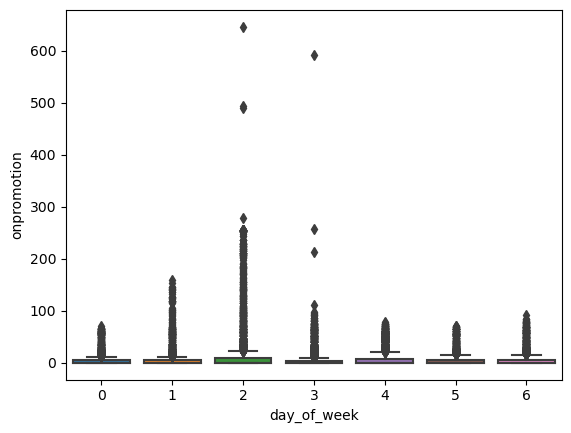

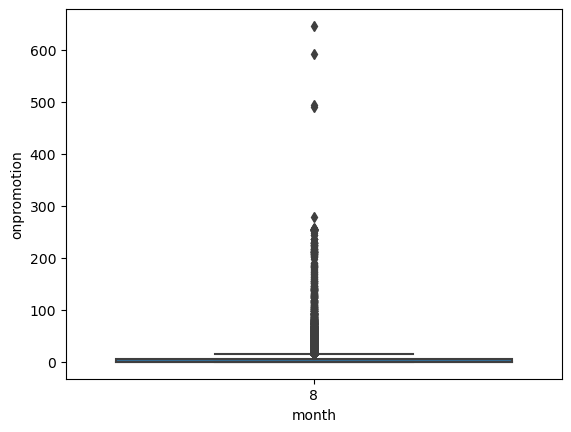

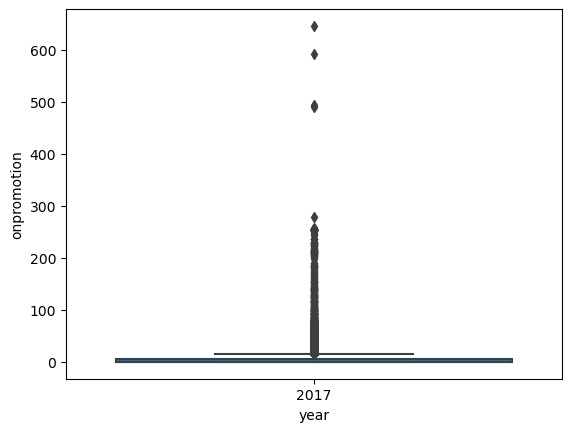

In [ ]:
# Check the first few rows of the data
print(df_test.head())
# Check the dimensions of the data
print(df_test.shape)

# Check for missing values
print(df_test.isnull().sum())

# Summary statistics of the numerical columns
print(df_test.describe())

df_test.info()

# Plot the onpromotion for different stores
sns.boxplot(x='store_nbr', y='onpromotion', data=df_test)
plt.show()

# Plot the onpromotion for different items
sns.boxplot(x='family', y='onpromotion', data=df_test)
plt.show()

# Convert the date column to datetime
df_test['date'] = pd.to_datetime(df_test['date'])

# Extract the day of the week, month, and year information
df_test['day_of_week'] = df_test['date'].dt.dayofweek
df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year

# Plot the onpromotion across different days of the week
sns.boxplot(x='day_of_week', y='onpromotion', data=df_test)
plt.show()

# Plot the onpromotion across different months
sns.boxplot(x='month', y='onpromotion', data=df_test)
plt.show()

# Plot the onpromotion across different years
sns.boxplot(x='year', y='onpromotion', data=df_test)
plt.show()


**df_stores**

In [ ]:
# Check the first few rows of the data
print(df_stores.head())
# Check the dimensions of the data
print(df_stores.shape)

# Check for missing values
print(df_stores.isnull().sum())

# Summary statistics of the numerical columns
print(df_stores.describe())

print(df_stores.info)

   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
(54, 5)
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
       store_nbr    cluster
count  54.000000  54.000000
mean   27.500000   8.481481
std    15.732133   4.693395
min     1.000000   1.000000
25%    14.250000   4.000000
50%    27.500000   8.500000
75%    40.750000  13.000000
max    54.000000  17.000000
<bound method DataFrame.info of     store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Qui

**df_oil**

         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20
(1218, 2)
date           0
dcoilwtico    43
dtype: int64
        dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None


<AxesSubplot:>

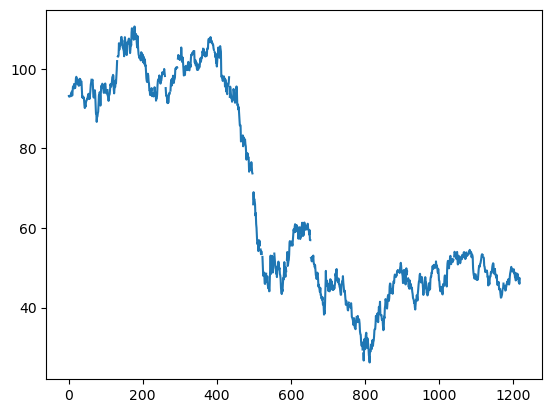

In [ ]:
# Check the first few rows of the data
print(df_oil.head())

# Check the dimensions of the data
print(df_oil.shape)

# Check for missing values
print(df_oil.isnull().sum())

# Summary statistics of the numerical columns
print(df_oil.describe())

print(df_oil.info())

df_oil.dcoilwtico.plot()


**df_transactions**

In [ ]:
# Check the first few rows of the data
print(df_transactions.head())

# Check the dimensions of the data
print(df_transactions.shape)

# Check for missing values
print(df_transactions.isnull().sum())

# Summary statistics of the numerical columns

print(df_transactions.info())


         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922
(83488, 3)
date            0
store_nbr       0
transactions    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None


**df_holidays_events**

In [ ]:
# Check the first few rows of the data
print(df_holidays_events.head())

# Check the dimensions of the data
print(df_holidays_events.shape)

# Check for missing values
print(df_holidays_events.isnull().sum())

# Summary statistics of the numerical columns
print(df_holidays_events.describe())

print(df_holidays_events.info())



         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
(350, 6)
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
              date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
fre

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

**df_train**

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
day_of_week          7
month               12
year                 5
dtype: int64
0


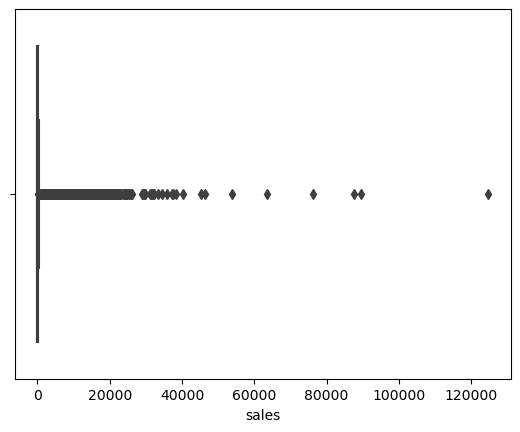

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\4284084753.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_train.skew())


id            -9.492127e-16
store_nbr      0.000000e+00
sales          7.358758e+00
onpromotion    1.116656e+01
day_of_week    1.856939e-03
month          1.128158e-01
year           9.626854e-02
dtype: float64


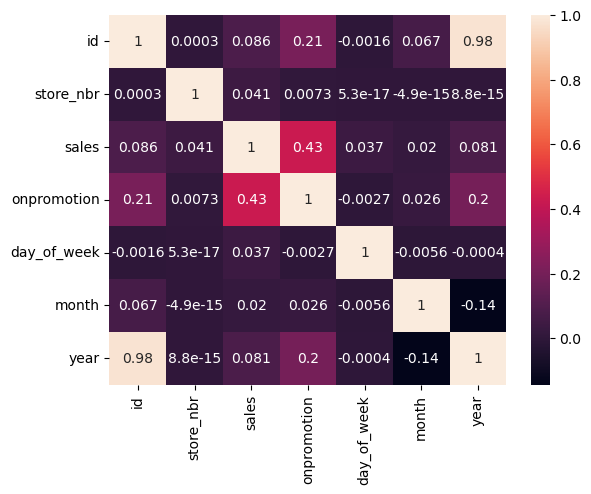

id                               0
date           2013-01-01 00:00:00
store_nbr                        1
family                  AUTOMOTIVE
sales                          0.0
onpromotion                      0
day_of_week                      0
month                            1
year                          2013
dtype: object
id                         3000887
date           2017-08-15 00:00:00
store_nbr                       54
family                     SEAFOOD
sales                     124717.0
onpromotion                    741
day_of_week                      6
month                           12
year                          2017
dtype: object


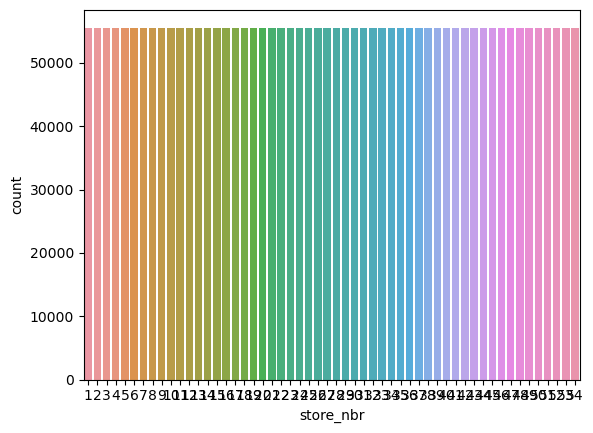

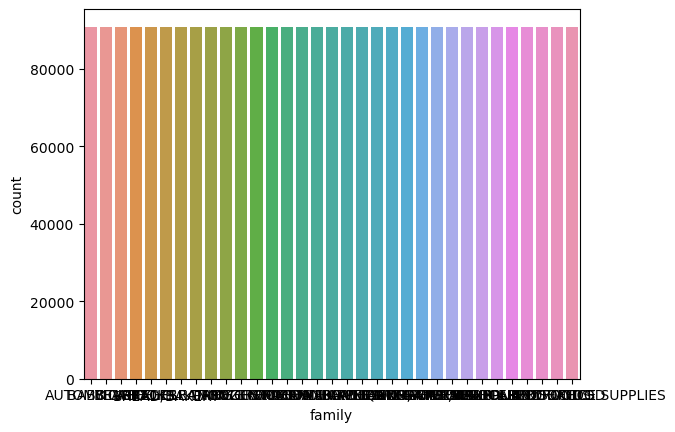

In [ ]:
# Check the number of unique values for each column
print(df_train.nunique())

# Check for duplicates
print(df_train.duplicated().sum())

# Check for outliers
sns.boxplot(x=df_train['sales'])
plt.show()

# Check for skewness
print(df_train.skew())

# Check for correlations
corr = df_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Check for the presence of extreme values
print(df_train.min())
print(df_train.max())

# Check the distribution of sales across different stores
sns.countplot(x='store_nbr', data=df_train)
plt.show()

# Check the distribution of sales across different items
sns.countplot(x='family', data=df_train)
plt.show()


**df_test**

id             28512
date              16
store_nbr         54
family            33
onpromotion      212
day_of_week        7
month              1
year               1
dtype: int64
0
id             0.000000
store_nbr      0.000000
onpromotion    8.496281
day_of_week    0.090125
month          0.000000
year           0.000000
dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\1649261247.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_test.skew())


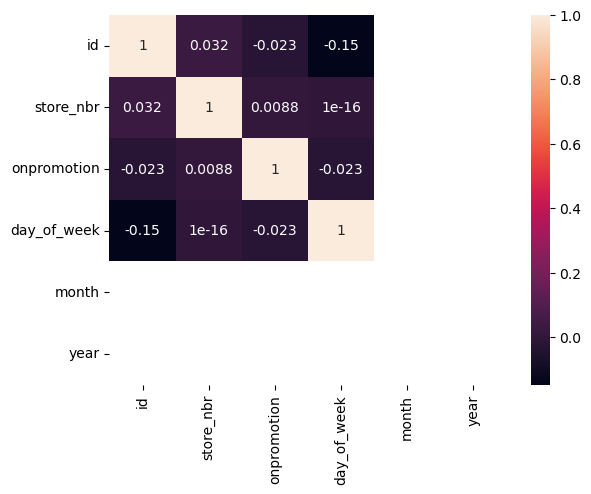

id                         3000888
date           2017-08-16 00:00:00
store_nbr                        1
family                  AUTOMOTIVE
onpromotion                      0
day_of_week                      0
month                            8
year                          2017
dtype: object
id                         3029399
date           2017-08-31 00:00:00
store_nbr                       54
family                     SEAFOOD
onpromotion                    646
day_of_week                      6
month                            8
year                          2017
dtype: object


In [ ]:
# Check the number of unique values for each column
print(df_test.nunique())

# Check for duplicates
print(df_test.duplicated().sum())

# Check for skewness
print(df_test.skew())

# Check for correlations
corr = df_test.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Check for the presence of extreme values
print(df_test.min())
print(df_test.max())


**df_transactions**

date            1682
store_nbr         54
transactions    4993
dtype: int64
0
store_nbr       0.003456
transactions    1.518351
dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\297516335.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_transactions.skew())


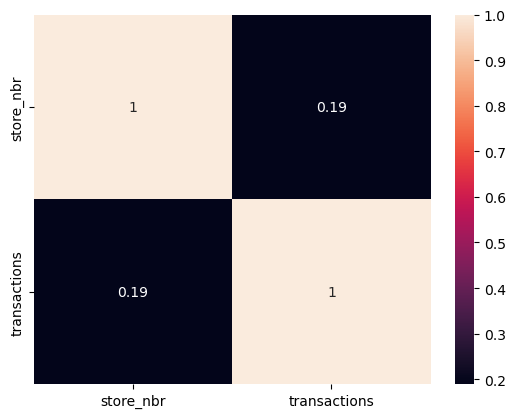

date            2013-01-01
store_nbr                1
transactions             5
dtype: object
date            2017-08-15
store_nbr               54
transactions          8359
dtype: object


In [ ]:
# Check the number of unique values for each column
print(df_transactions.nunique())

# Check for duplicates
print(df_transactions.duplicated().sum())

# Check for skewness
print(df_transactions.skew())

# Check for correlations
corr = df_transactions.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Check for the presence of extreme values
print(df_transactions.min())
print(df_transactions.max())



**df_stores**

store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64
0
store_nbr    0.000000
cluster      0.041241
dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\2058634373.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_stores.skew())


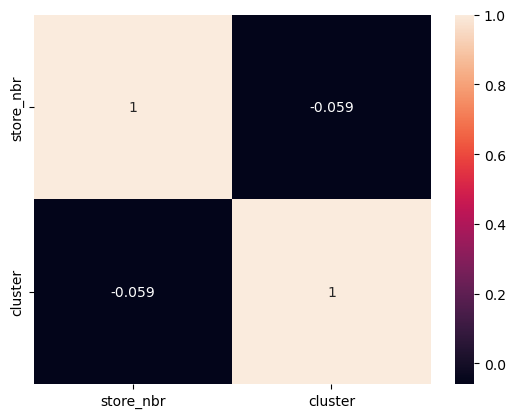

store_nbr         1
city         Ambato
state         Azuay
type              A
cluster           1
dtype: object
store_nbr               54
city         Santo Domingo
state           Tungurahua
type                     E
cluster                 17
dtype: object


In [ ]:
# Check the number of unique values for each column
print(df_stores.nunique())

# Check for duplicates
print(df_stores.duplicated().sum())

# Check for skewness
print(df_stores.skew())

# Check for correlations
corr = df_stores.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Check for the presence of extreme values
print(df_stores.min())
print(df_stores.max())



**df_oil**

date          1218
dcoilwtico     998
dtype: int64
0
dcoilwtico    0.321648
dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\3337367275.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_oil.skew())


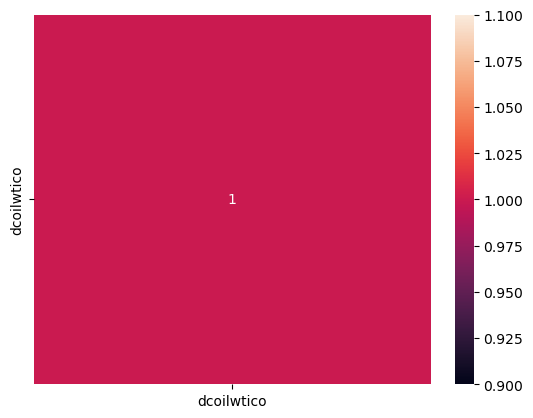

date          2013-01-01
dcoilwtico         26.19
dtype: object
date          2017-08-31
dcoilwtico        110.62
dtype: object


In [ ]:
# Check the number of unique values for each column
print(df_oil.nunique())

# Check for duplicates
print(df_oil.duplicated().sum())

# Check for skewness
print(df_oil.skew())

# Check for correlations
corr = df_oil.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Check for the presence of extreme values
print(df_oil.min())
print(df_oil.max())



**df_holidays_events**

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64
0
transferred    5.140864
dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\1248134091.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_holidays_events.skew())


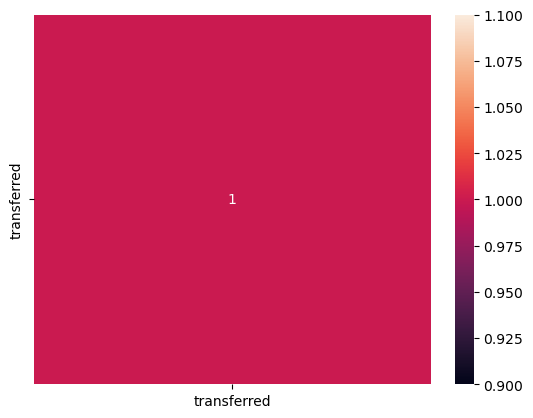

date                     2012-03-02
type                     Additional
locale                        Local
locale_name                  Ambato
description    Batalla de Pichincha
transferred                   False
dtype: object
date                               2017-12-26
type                                 Work Day
locale                               Regional
locale_name    Santo Domingo de los Tsachilas
description                     Viernes Santo
transferred                              True
dtype: object


In [ ]:
# Check the number of unique values for each column
print(df_holidays_events.nunique())

# Check for duplicates
print(df_holidays_events.duplicated().sum())

# Check for skewness
print(df_holidays_events.skew())

# Check for correlations
corr = df_holidays_events.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Check for the presence of extreme values
print(df_holidays_events.min())
print(df_holidays_events.max())


In [ ]:
# Handle duplicates
df_stores.drop_duplicates(inplace=True)

df_holidays_events.drop_duplicates(inplace=True)

df_oil.drop_duplicates(inplace=True)

df_test.drop_duplicates(inplace=True)

df_train.drop_duplicates(inplace=True)

df_transactions.drop_duplicates(inplace=True)

**merge data**

In [ ]:
df_merged_train = pd.concat([df_train, df_oil, df_stores, df_holidays_events, df_transactions], axis=0)
df_merged_test = pd.concat([df_oil, df_stores, df_holidays_events, df_test, df_transactions], axis=0)

**df_merged_train**

In [ ]:
# Check the first few rows of the data
print(df_merged_train.head())

# Check the dimensions of the data
print(df_merged_train.shape)

# Check for duplicates
print(df_merged_train.duplicated().sum())

# Check for missing values
print(df_merged_train.isnull().sum())

# Summary statistics of the numerical columns
print(df_merged_train.describe())

print(df_merged_train.info())

    id                 date  store_nbr      family  sales  onpromotion  \
0  0.0  2013-01-01 00:00:00        1.0  AUTOMOTIVE    0.0          0.0   
1  1.0  2013-01-01 00:00:00        1.0   BABY CARE    0.0          0.0   
2  2.0  2013-01-01 00:00:00        1.0      BEAUTY    0.0          0.0   
3  3.0  2013-01-01 00:00:00        1.0   BEVERAGES    0.0          0.0   
4  4.0  2013-01-01 00:00:00        1.0       BOOKS    0.0          0.0   

   day_of_week  month    year  dcoilwtico city state type  cluster locale  \
0          1.0    1.0  2013.0         NaN  NaN   NaN  NaN      NaN    NaN   
1          1.0    1.0  2013.0         NaN  NaN   NaN  NaN      NaN    NaN   
2          1.0    1.0  2013.0         NaN  NaN   NaN  NaN      NaN    NaN   
3          1.0    1.0  2013.0         NaN  NaN   NaN  NaN      NaN    NaN   
4          1.0    1.0  2013.0         NaN  NaN   NaN  NaN      NaN    NaN   

  locale_name description transferred  transactions  
0         NaN         NaN         NaN 

id                85110
date                 54
store_nbr          1568
family            85110
sales             85110
onpromotion       85110
day_of_week       85110
month             85110
year              85110
dcoilwtico      3084823
city            3085944
state           3085944
type            3085594
cluster         3085944
locale          3085648
locale_name     3085648
description     3085648
transferred     3085648
transactions    3002510
dtype: int64
id              3000888
date               3438
store_nbr            54
family               33
sales            379610
onpromotion         362
day_of_week           7
month                12
year                  5
dcoilwtico          998
city                 22
state                16
type                 11
cluster              17
locale                3
locale_name          24
description         103
transferred           2
transactions       4993
dtype: int64
0


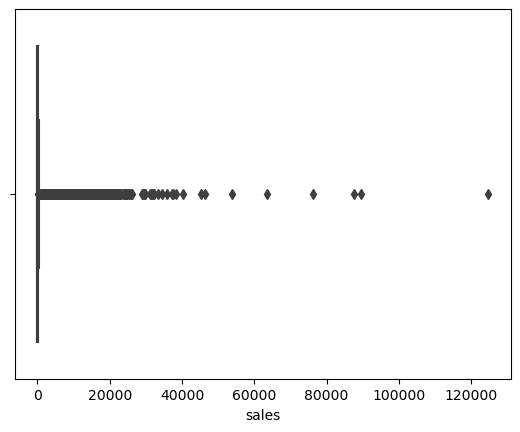

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\1113165888.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_merged_train.skew())


id             -9.492127e-16
store_nbr       8.461673e-05
sales           7.358758e+00
onpromotion     1.116656e+01
day_of_week     1.856939e-03
month           1.128158e-01
year            9.626854e-02
dcoilwtico      3.216483e-01
cluster         4.124137e-02
transferred     5.140864e+00
transactions    1.518351e+00
dtype: float64


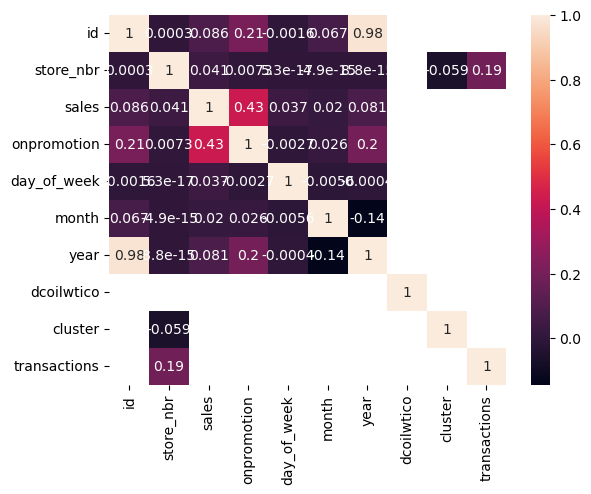

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\1113165888.py:23: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_merged_train.min())


id                 0.0
store_nbr          1.0
sales              0.0
onpromotion        0.0
day_of_week        0.0
month              1.0
year            2013.0
dcoilwtico       26.19
cluster            1.0
transferred      False
transactions       5.0
dtype: object


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\1113165888.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_merged_train.max())


id              3000887.0
store_nbr            54.0
sales            124717.0
onpromotion         741.0
day_of_week           6.0
month                12.0
year               2017.0
dcoilwtico         110.62
cluster              17.0
transferred          True
transactions       8359.0
dtype: object


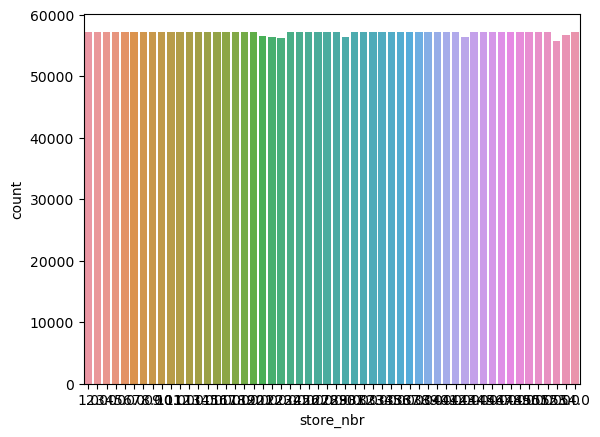

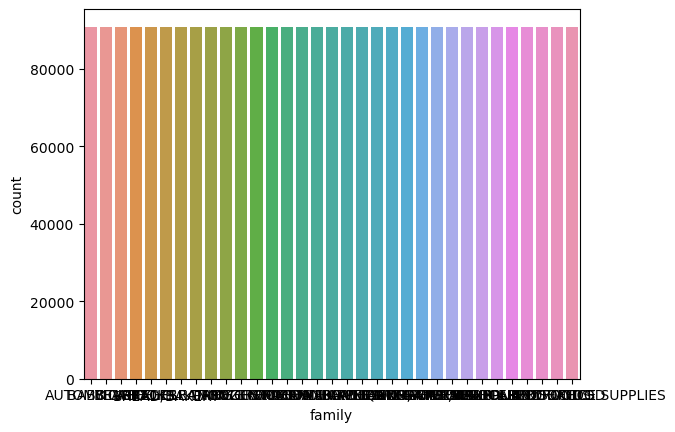

In [ ]:
# Check for missing values
print(df_merged_train.isnull().sum())

# Check the number of unique values for each column
print(df_merged_train.nunique())

# Check for duplicates
print(df_merged_train.duplicated().sum())

# Check for outliers
sns.boxplot(x=df_merged_train['sales'])
plt.show()

# Check for skewness
print(df_merged_train.skew())

# Check for correlations
corr = df_merged_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Check for the presence of extreme values
print(df_merged_train.min())
print(df_merged_train.max())

# Check the distribution of sales across different stores
sns.countplot(x='store_nbr', data=df_merged_train)
plt.show()

# Check the distribution of sales across different items
sns.countplot(x='family', data=df_merged_train)
plt.show()


**df_merged_test**

In [ ]:
# Check the first few rows of the data
print(df_merged_test.head())

# Check the dimensions of the data
print(df_merged_test.shape)

# Check for duplicates
print(df_merged_test.duplicated().sum())

# Check for missing values
print(df_merged_test.isnull().sum())

# Summary statistics of the numerical columns
print(df_merged_test.describe())

print(df_merged_test.info())

         date  dcoilwtico  store_nbr city state type  cluster locale  \
0  2013-01-01         NaN        NaN  NaN   NaN  NaN      NaN    NaN   
1  2013-01-02       93.14        NaN  NaN   NaN  NaN      NaN    NaN   
2  2013-01-03       92.97        NaN  NaN   NaN  NaN      NaN    NaN   
3  2013-01-04       93.12        NaN  NaN   NaN  NaN      NaN    NaN   
4  2013-01-07       93.20        NaN  NaN   NaN  NaN      NaN    NaN   

  locale_name description transferred  id family  onpromotion  day_of_week  \
0         NaN         NaN         NaN NaN    NaN          NaN          NaN   
1         NaN         NaN         NaN NaN    NaN          NaN          NaN   
2         NaN         NaN         NaN NaN    NaN          NaN          NaN   
3         NaN         NaN         NaN NaN    NaN          NaN          NaN   
4         NaN         NaN         NaN NaN    NaN          NaN          NaN   

   month  year  transactions  
0    NaN   NaN           NaN  
1    NaN   NaN           NaN  
2    

date                54
dcoilwtico      112447
store_nbr         1568
city            113568
state           113568
type            113218
cluster         113568
locale          113272
locale_name     113272
description     113272
transferred     113272
id               85110
family           85110
onpromotion      85110
day_of_week      85110
month            85110
year             85110
transactions     30134
dtype: int64
date             1770
dcoilwtico        998
store_nbr          54
city               22
state              16
type               11
cluster            17
locale              3
locale_name        24
description       103
transferred         2
id              28512
family             33
onpromotion       212
day_of_week         7
month               1
year                1
transactions     4993
dtype: int64
0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\1257955987.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_merged_test.skew())


dcoilwtico      0.321648
store_nbr       0.002522
cluster         0.041241
transferred     5.140864
id              0.000000
onpromotion     8.496281
day_of_week     0.090125
month           0.000000
year            0.000000
transactions    1.518351
dtype: float64


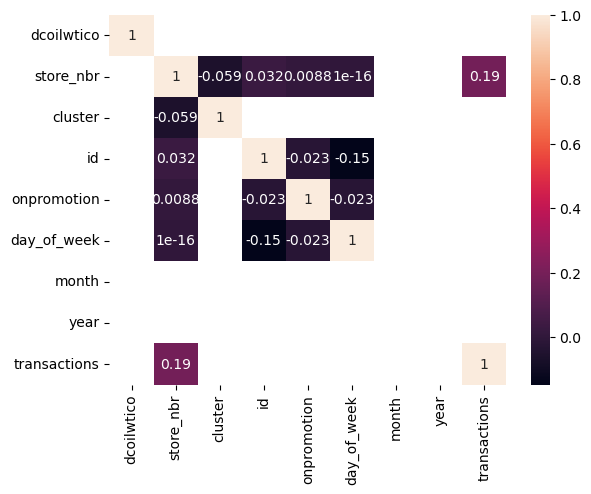

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\1257955987.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_merged_test.min())


dcoilwtico          26.19
store_nbr             1.0
cluster               1.0
transferred         False
id              3000888.0
onpromotion           0.0
day_of_week           0.0
month                 8.0
year               2017.0
transactions          5.0
dtype: object


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\1257955987.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_merged_test.max())


dcoilwtico         110.62
store_nbr            54.0
cluster              17.0
transferred          True
id              3029399.0
onpromotion         646.0
day_of_week           6.0
month                 8.0
year               2017.0
transactions       8359.0
dtype: object


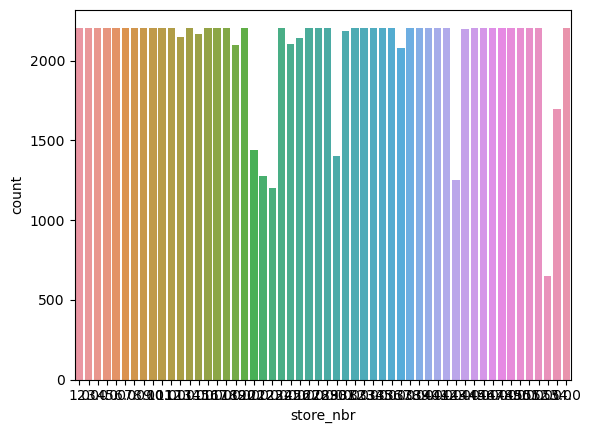

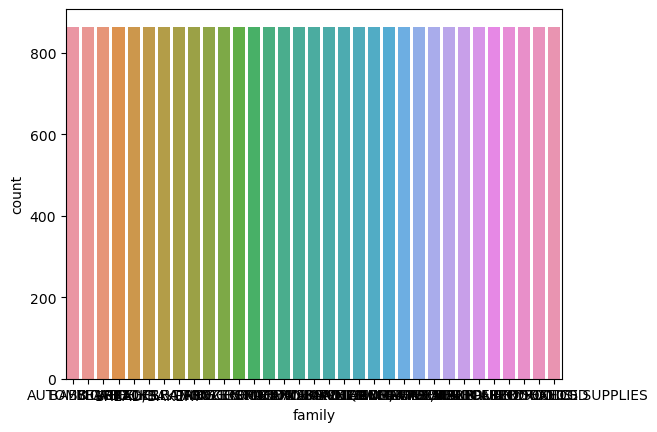

In [ ]:
# Check for missing values
print(df_merged_test.isnull().sum())

# Check the number of unique values for each column
print(df_merged_test.nunique())

# Check for duplicates
print(df_merged_test.duplicated().sum())

# Check for skewness
print(df_merged_test.skew())

# Check for correlations
corr = df_merged_test.corr()
sns.heatmap(corr, annot=True)
plt.show()

# Check for the presence of extreme values
print(df_merged_test.min())
print(df_merged_test.max())

# Check the distribution of sales across different stores
sns.countplot(x='store_nbr', data=df_merged_test)
plt.show()

# Check the distribution of sales across different items
sns.countplot(x='family', data=df_merged_test)
plt.show()


## Drop Duplicates

In [ ]:
df_merged_train.drop_duplicates(inplace=True)
df_merged_test.drop_duplicates(inplace=True)

## Impute Missing Values

In [ ]:
df_merged_train['date'] = df_merged_train['date'].astype('datetime64[s]')
df_merged_train['date'] = df_merged_train['date'] - pd.Timestamp('1970-01-01')
df_merged_train['date'] = df_merged_train['date'].dt.total_seconds()

df_merged_test['date'] = df_merged_test['date'].astype('datetime64[s]')
df_merged_test['date'] = df_merged_test['date'] - pd.Timestamp('1970-01-01')
df_merged_test['date'] = df_merged_test['date'].dt.total_seconds()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\3336102640.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_merged_train['date'] = df_merged_train['date'].astype('datetime64[s]')


In [ ]:
from sklearn.impute import SimpleImputer

#  impute date column
columns_to_impute = ['date']

# Create an instance of the SimpleImputer class with the mean strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the data and transform it to impute the missing values
df_imputed = imputer.fit_transform(df_merged_train[columns_to_impute])

# Specify the columns to impute
columns_to_impute = ['store_nbr', 'family', 'sales', 'onpromotion', 'day_of_week', 'month', 'year', 'dcoilwtico', 'city', 'state', 'type', 'cluster', 'locale', 'locale_name', 'description', 'transferred', 'transactions']

# Initialize the imputer with the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it to impute the missing values
df_imputed = imputer.fit_transform(df_merged_train[columns_to_impute])

# Convert the imputed array back to a pandas DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute)

# Merge the imputed columns back into the original DataFrame
df_merged_train[columns_to_impute] = df_imputed


In [ ]:
from sklearn.impute import SimpleImputer

#  impute date column
columns_to_impute = ['date']

# Create an instance of the SimpleImputer class with the mean strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the data and transform it to impute the missing values
df_imputed = imputer.fit_transform(df_merged_test[columns_to_impute])

# Specify the columns to impute
columns_to_impute = ['store_nbr', 'family', 'onpromotion', 'day_of_week', 'month', 'year', 'dcoilwtico', 'city', 'state', 'type', 'cluster', 'locale', 'locale_name', 'description', 'transferred', 'transactions']

# Initialize the imputer with the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it to impute the missing values
df_imputed = imputer.fit_transform(df_merged_test[columns_to_impute])

# Convert the imputed array back to a pandas DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute)

# Merge the imputed columns back into the original DataFrame
df_merged_test[columns_to_impute] = df_imputed


In [ ]:
# Create a list to store the columns to impute
columns_to_impute = ['date']

# Create an instance of the SimpleImputer class with the mean strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the data and transform it to impute the missing values
df_imputed = imputer.fit_transform(df_merged_train[columns_to_impute])

# Convert the imputed array back to a pandas DataFrame
df_merged_train[columns_to_impute] = pd.DataFrame(df_imputed, columns=columns_to_impute)


In [ ]:
# Create a list to store the columns to impute
columns_to_impute = ['date']

# Create an instance of the SimpleImputer class with the mean strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the data and transform it to impute the missing values
df_imputed = imputer.fit_transform(df_merged_test[columns_to_impute])

# Convert the imputed array back to a pandas DataFrame
df_merged_test[columns_to_impute] = pd.DataFrame(df_imputed, columns=columns_to_impute)


In [ ]:
# Check for missing values
print(df_merged_train.isnull().sum())

id              85110
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
day_of_week         0
month               0
year                0
dcoilwtico          0
city                0
state               0
type                0
cluster             0
locale              0
locale_name         0
description         0
transferred         0
transactions        0
dtype: int64


In [ ]:
# Check for missing values
print(df_merged_test.isnull().sum())

date                0
dcoilwtico          0
store_nbr           0
city                0
state               0
type                0
cluster             0
locale              0
locale_name         0
description         0
transferred         0
id              85110
family              0
onpromotion         0
day_of_week         0
month               0
year                0
transactions        0
dtype: int64


## New Features Creation

In [ ]:
# Create a new feature: total sales per day
df_merged_train['total_sales_per_day'] = df_merged_train.groupby(['date'])['sales'].transform('sum')

# Create a new feature: average sales per store per day
df_merged_train['avg_sales_per_store_per_day'] = df_merged_train.groupby(['date', 'store_nbr'])['sales'].transform('mean')

# Create a new feature: average sales per family per day
df_merged_train['avg_sales_per_family_per_day'] = df_merged_train.groupby(['date', 'family'])['sales'].transform('mean')

# Create a new feature: the number of times a family was sold in a day
df_merged_train['num_sales_per_family_per_day'] = df_merged_train.groupby(['date', 'family'])['sales'].transform('count')

# Create a new feature: the number of times a family was sold in a store in a day
df_merged_train['num_sales_per_family_per_store_per_day'] = df_merged_train.groupby(['date', 'store_nbr', 'family'])['sales'].transform('count')

# Create a new feature: total sales per store
df_merged_train['total_sales_per_store'] = df_merged_train.groupby(['store_nbr'])['sales'].transform('sum')

# Create a new feature: total sales per family
df_merged_train['total_sales_per_family'] = df_merged_train.groupby(['family'])['sales'].transform('sum')


In [ ]:
df_merged_train.head()

,id,date,store_nbr,family,sales,onpromotion,day_of_week,month,year,dcoilwtico,...,description,transferred,transactions,total_sales_per_day,avg_sales_per_store_per_day,avg_sales_per_family_per_day,num_sales_per_family_per_day,num_sales_per_family_per_store_per_day,total_sales_per_store,total_sales_per_family
0,0.0,1.356998e+09,1.0,AUTOMOTIVE,0.0,0.0,1.0,1.0,2013.0,46.02,...,Carnaval,False,1207.0,7534.856997,0.0,0.000000,158,5,14373408.621652,565827.0
1,1.0,1.356998e+09,1.0,BABY CARE,0.0,0.0,1.0,1.0,2013.0,46.02,...,Carnaval,False,1207.0,7534.856997,0.0,0.000000,158,5,14373408.621652,10051.0
2,2.0,1.356998e+09,1.0,BEAUTY,0.0,0.0,1.0,1.0,2013.0,46.02,...,Carnaval,False,1207.0,7534.856997,0.0,0.037975,158,5,14373408.621652,344225.0
3,3.0,1.356998e+09,1.0,BEVERAGES,0.0,0.0,1.0,1.0,2013.0,46.02,...,Carnaval,False,1207.0,7534.856997,0.0,15.379747,158,5,14373408.621652,219500437.0
4,4.0,1.356998e+09,1.0,BOOKS,0.0,0.0,1.0,1.0,2013.0,46.02,...,Carnaval,False,1207.0,7534.856997,0.0,0.000000,158,5,14373408.621652,6438.0


## Features Encoding




In [ ]:
df_merged_train['date'] = pd.to_numeric(pd.to_datetime(df_merged_train['date']))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X = df_merged_train.drop('sales', axis=1)
y = df_merged_train['sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


## Features Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns in the DataFrame
numerical_cols = ['age', 'height', 'weight', 'bmi', 'glucose', 'insulin']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical data and transform it
df_scaled = scaler.fit_transform(df_merged_train[numerical_cols])

# Convert the scaled array back to a pandas DataFrame and concatenate it with the original DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)
df_merged_train_scaled = pd.concat([df_merged_train.drop(columns=numerical_cols), df_scaled], axis=1)


## Optional: Train Dataset Balancing 

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Random over-sampling
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Random under-sampling
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)


# Machine Learning Modeling 
 **Build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare the target variable
y = df_merged_train['sales']

# Create a binary variable to indicate peak periods
df_merged_train['peak_period'] = np.where(df_merged_train['type'], 1, 0)

# Split the data into training and test sets
train_data = df_merged_train[:int(len(df_merged_train)*0.8)]
test_data = df_merged_test[int(len(df_merged_test)*0.8):]

# Check the data types of the 'sales' column
print(train_data['sales'].dtype)

# Convert the 'sales' column to a NumPy array
sales_array = np.asarray(train_data['sales'])

# Check the data type of the NumPy array
print(sales_array.dtype)

# Inspect the data in the 'sales' column to identify the issue
print(train_data['sales'].unique())

# Modify the data to ensure a consistent dtype
train_data['sales'] = train_data['sales'].astype('float')

# Check the data type again
print(train_data['sales'].dtype)




object
object
[0.0 2.0 810.0 ... 119.65 48.844 848.968]
float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13124\2040775521.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sales'] = train_data['sales'].astype('float')


### Train the Model/Evaluate(Evalset)/Predict(Testset) the three models

In [ ]:
# Train the ARIMA model on the training data
arima_model = ARIMA(train_data['sales'], order=(1,1,1))
arima_fit = arima_model.fit()

# Predict using the ARIMA model on the test data
arima_predictions = arima_fit.predict(start=len(train_data), end=len(y)-1, typ='levels')

# Train the linear regression model on the training data
reg_model = LinearRegression()
reg_model.fit(train_data[['peak_period']], train_data['sales'])

# Predict using the linear regression model on the test data
reg_predictions = reg_model.predict(test_data[['peak_period']])

# Train the random forest model on the training data
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(train_data.drop(columns=['sales']), train_data['sales'])

# Predict using the random forest model on the test data
rf_predictions = rf_model.predict(test_data.drop(columns=['sales']))

# Combine the predictions from all three models
combined_predictions = arima_predictions + reg_predictions + rf_predictions
combined_predictions /= 3

# Evaluate the performance of the combined model
mae = mean_absolute_error(test_data['sales'], combined_predictions)
print("Mean Absolute Error: ", mae)


## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |
| 2   |  -             |  -             | -                 |

You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.